In [1]:
%matplotlib notebook
from math import hypot
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class ROCK:
    
    def __init__(self, data, eps, mu):
        
        self.dist = lambda x, y: hypot(x[0] - y[0], x[1] - y[1])

        self.data = data
        self.len = len(data)
        self.eps = eps
        self.mu = mu
        self.cluster = None

    def execute(self):

        links = np.zeros((self.len, self.len))
        for i in range(self.len):
            for j in range(i + 1, self.len):
                d = self.dist(data[i], data[j])
                if d < self.eps:
                    links[i, j] = 1
                    links[j, i] = 1
                    
        linksN = np.sum(links, axis=1)
        cluster = np.zeros(self.len)
        cur_cluster = 1
        
        for i in range(self.len):
            if cluster[i] == 0:
                
                cluster[i] = cur_cluster
                neighbors = np.argwhere(links[i] == 1).flatten()
                
                for j in neighbors:
                    if cluster[j] == 0:
                        if linksN[j] >= self.mu:
                            cluster[j] = cur_cluster
                            
                cur_cluster += 1
                
        self.cluster = cluster


In [25]:
data = np.random.uniform(-5, 5, (150, 2))
eps = 4
m = 6

In [26]:
rock = ROCK(data, eps, m)
rock.execute()

<IPython.core.display.Javascript object>


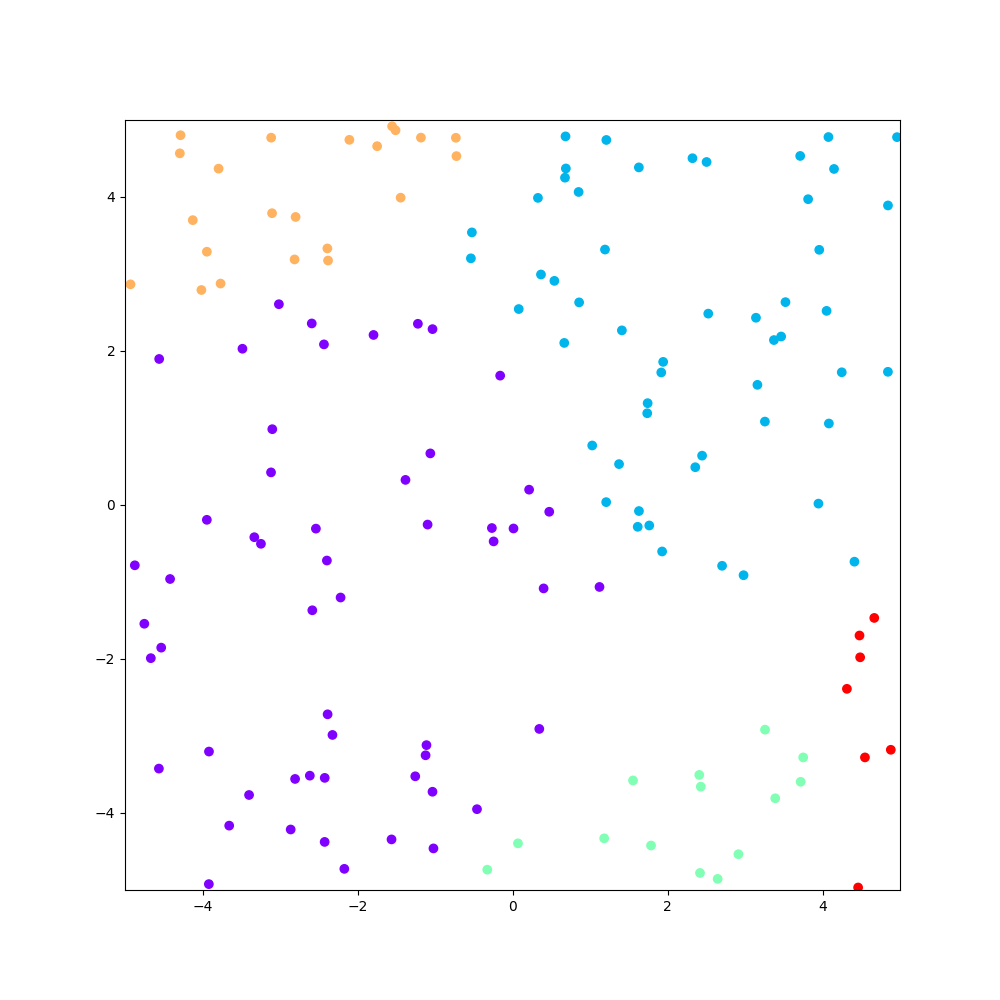

In [27]:
figA = plt.figure(figsize=(10, 10))
axA = figA.add_subplot()

plt.xlim(-5, 5)
plt.ylim(-5, 5)

axA.scatter(data[:, 0], data[:, 1], c = rock.cluster, cmap='rainbow')